# Happiness Index Dataset Cleaning

In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
Happiness_index_master_file = pd.read_excel("Happiness_Index_Dataset.xlsx")

Happiness_index_master_file.isnull().sum()

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [3]:
Happiness_index_master_file.fillna(value='Not Available', inplace =True)

Happiness_index_master_file.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.16869,0.450662,49.2097,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.92969,-1.65508,1.774662,0.476600,Not Available,Not Available,Not Available
1,Afghanistan,2009,4.401778,7.33379,0.552308,49.6244,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.04409,-1.63502,1.722688,0.391362,Not Available,Not Available,0.441906
2,Afghanistan,2010,4.758381,7.38663,0.539075,50.009,0.600127,0.13763,0.706766,0.618265,0.275324,0.299357,-1.99181,-1.61718,1.878622,0.394803,Not Available,Not Available,0.327318
3,Afghanistan,2011,3.831719,7.41502,0.521104,50.3673,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.91902,-1.61622,1.785360,0.465942,Not Available,Not Available,0.336764
4,Afghanistan,2012,3.782938,7.51713,0.520637,50.7093,0.530935,0.247159,0.77562,0.710385,0.267919,0.43544,-1.843,-1.40408,1.798283,0.475367,Not Available,Not Available,0.34454


In [3]:
Happiness_index_master_file.drop(Happiness_index_master_file.columns[11:20],axis=1, inplace=True)

Happiness_index_master_file.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919


In [4]:
Happiness_index_master_file.to_csv("Happiness_dataset_cleaned_v2.csv") 

# Merging with Economy Level Data

In [5]:
Economy_status_file = pd.read_csv("Economy_Level_dataset.csv")

In [7]:
Economy_status_file.head()

,Unnamed: 0,Country,Region,Economy level
0,1,Afghanistan,South Asia,Developing
1,2,Albania,Europe & Central Asia,Developing
2,3,Algeria,Middle East & North Africa,Developing
3,4,American Samoa,East Asia & Pacific,Developing
4,5,Andorra,Europe & Central Asia,Developed


In [6]:
Economy_status_file.drop(['Unnamed: 0'], axis = 1, inplace=True) #Should run from the first time

Economy_status_file.head()

,Country,Region,Economy level
0,Afghanistan,South Asia,Developing
1,Albania,Europe & Central Asia,Developing
2,Algeria,Middle East & North Africa,Developing
3,American Samoa,East Asia & Pacific,Developing
4,Andorra,Europe & Central Asia,Developed


In [7]:
Economy_status_file.columns = ['country','Region','Economy_Level']

Economy_status_file.head()

,country,Region,Economy_Level
0,Afghanistan,South Asia,Developing
1,Albania,Europe & Central Asia,Developing
2,Algeria,Middle East & North Africa,Developing
3,American Samoa,East Asia & Pacific,Developing
4,Andorra,Europe & Central Asia,Developed


In [8]:
merged_data_set_2 = pd.merge(Happiness_index_master_file, Economy_status_file, how = 'left', on= 'country')

merged_data_set_2.groupby('Economy_Level').count()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Region
Economy_Level,,,,,,,,,,,,
Developed,438,438,438,438,430,438,432,407,398,431,433,438
Developing,951,951,951,944,946,951,930,928,909,940,944,951


In [9]:
merged_data_set_2.to_csv("Happiness_dataset_cleaned_v2.csv") #maybe need to change it to Happiness_dataset_cleaned. Severe merging issues

# Transitioned Country Dataset Cleaning

In [10]:
Raw_Transition_data = pd.read_excel("Status_Raw_Dataset.xlsx", sheet_name = "Country Analytical History" )

Raw_Transition_data.reset_index(inplace=True)

Raw_Transition_data #Raw Dataset


,index,World Bank Analytical Classifications,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,NaN,(presented in World Development Indicators),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,GNI per capita in US$ (Atlas methodology),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Bank's fiscal year:,FY89,FY90,FY91,FY92,FY93,FY94,FY95,FY96,...,FY09,FY10,FY11,FY12,FY13,FY14,FY15,FY16,FY17,FY18
4,NaN,Data for calendar year :,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,NaN,Low income (L),<= 480,<= 545,<= 580,<= 610,<= 635,<= 675,<= 695,<= 725,...,<= 935,<= 975,<= 995,"<= 1,005","<= 1,025","<= 1,035","<= 1,045","<= 1,045","<= 1,025","<= 1,005"
6,NaN,Lower middle income (LM),"481-1,940","546-2,200","581-2,335","611-2,465","636-2,555","676-2,695","696-2,785","726-2,895",...,"936-3,705","976-3,855","996-3,945","1,006-3,975","1,026-4,035","1,036-4,085","1,046-4,125","1,046-4,125","1,026-4,035","1,006-3,955"
7,NaN,Upper middle income (UM),"1,941-6,000","2,201-6,000","2,336-6,000","2,466-7,620","2,556-7,910","2,696-8,355","2,786-8,625","2,896-8,955",...,"3,706-11,455","3,856-11,905","3,946-12,195","3,976-12,275","4,036-12,475","4,086-12,615","4,126-12,745","4,126-12,735","4,036-12,475","3,956-12,235"
8,NaN,High income (H),"> 6,000","> 6,000","> 6,000","> 7,620","> 7,910","> 8,355","> 8,625","> 8,955",...,"> 11,455","> 11,905","> 12,195","> 12,275","> 12,475","> 12,615","> 12,745","> 12,735","> 12,475","> 12,235"
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Cleaning the first few unwanted rows

Raw_Transition_data_v2 = Raw_Transition_data.drop([0,1,2,3,5,6,7,8,9], axis =0)

Raw_Transition_data_v2.reset_index(inplace=True)

Raw_Transition_data_v2

Raw_Transition_data_v2.drop(labels = "level_0", axis=1, inplace = True)


In [12]:
Raw_Transition_data_v2.head()

,index,World Bank Analytical Classifications,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,NaN,Data for calendar year :,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,AFG,Afghanistan,L,L,L,L,L,L,L,L,...,L,L,L,L,L,L,L,L,L,L
2,ALB,Albania,..,..,..,LM,LM,LM,L,L,...,LM,LM,UM,UM,LM,UM,UM,UM,UM,UM
3,DZA,Algeria,UM,UM,LM,LM,LM,LM,LM,LM,...,LM,UM,UM,UM,UM,UM,UM,UM,UM,UM
4,ASM,American Samoa,H,H,H,UM,UM,UM,UM,UM,...,UM,UM,UM,UM,UM,UM,UM,UM,UM,UM


In [13]:
Raw_Transition_data_v2.columns = Raw_Transition_data_v2.loc[0,:] # setting up the columns headers

Raw_Transition_data_v2.head()

,nan,Data for calendar year :,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,NaN,Data for calendar year :,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,AFG,Afghanistan,L,L,L,L,L,L,L,L,...,L,L,L,L,L,L,L,L,L,L
2,ALB,Albania,..,..,..,LM,LM,LM,L,L,...,LM,LM,UM,UM,LM,UM,UM,UM,UM,UM
3,DZA,Algeria,UM,UM,LM,LM,LM,LM,LM,LM,...,LM,UM,UM,UM,UM,UM,UM,UM,UM,UM
4,ASM,American Samoa,H,H,H,UM,UM,UM,UM,UM,...,UM,UM,UM,UM,UM,UM,UM,UM,UM,UM


In [14]:
#Raw_Transition_data_v2.drop(labels = 0, axis=0, inplace = True) #Deleting the first row

Raw_Transition_data_v2.replace('..',' ', inplace = True) # data Cleaning

Raw_Transition_data_v2.head()

,nan,Data for calendar year :,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,NaN,Data for calendar year :,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,AFG,Afghanistan,L,L,L,L,L,L,L,L,...,L,L,L,L,L,L,L,L,L,L
2,ALB,Albania,,,,LM,LM,LM,L,L,...,LM,LM,UM,UM,LM,UM,UM,UM,UM,UM
3,DZA,Algeria,UM,UM,LM,LM,LM,LM,LM,LM,...,LM,UM,UM,UM,UM,UM,UM,UM,UM,UM
4,ASM,American Samoa,H,H,H,UM,UM,UM,UM,UM,...,UM,UM,UM,UM,UM,UM,UM,UM,UM,UM


In [15]:
Raw_Transition_data_v2.rename({'Data for calendar year :':'Country_name'}, axis=1, inplace = True)

In [16]:
Raw_Transition_data_v2.drop(Raw_Transition_data_v2.columns[2: 23], axis=1, inplace = True)

In [17]:
#Replacing the column names

Raw_Transition_data_v2.columns = ['Country_Code', "Country_Name", '2008','2009','2010','2011','2012', '2013','2014','2015','2016']

Raw_Transition_data_v2.head()

,Country_Code,Country_Name,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,NaN,Data for calendar year :,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,AFG,Afghanistan,L,L,L,L,L,L,L,L,L
2,ALB,Albania,LM,UM,UM,LM,UM,UM,UM,UM,UM
3,DZA,Algeria,UM,UM,UM,UM,UM,UM,UM,UM,UM
4,ASM,American Samoa,UM,UM,UM,UM,UM,UM,UM,UM,UM


In [18]:
#Extracting the dataset which transitioned from developing to developed country

Raw_Transition_data_v3 = Raw_Transition_data_v2[Raw_Transition_data_v2['2016'] == 'H' ]

Raw_Transition_data_v4 = Raw_Transition_data_v3[Raw_Transition_data_v3['2008'] != 'H']

Raw_Transition_data_v4


,Country_Code,Country_Name,2008,2009,2010,2011,2012,2013,2014,2015,2016
28,VGB,British Virgin Islands,,,,,,,,H,H
41,CHL,Chile,UM,UM,UM,UM,H,H,H,H,H
51,CUW,Curaçao,,,H,H,H,H,H,H,H
75,GIB,Gibraltar,,H,H,,,,,H,H
109,LVA,Latvia,UM,H,UM,UM,H,H,H,H,H
115,LTU,Lithuania,UM,UM,UM,UM,H,H,H,H,H
150,PLW,Palau,UM,UM,UM,UM,UM,UM,UM,UM,H
156,POL,Poland,UM,H,H,H,H,H,H,H,H
169,SYC,Seychelles,UM,UM,UM,UM,UM,UM,H,H,H
172,SXM,Sint Maarten (Dutch part),,,H,H,H,H,H,H,H


In [19]:
#filtering all the null values

Raw_Transition_data_v5 = Raw_Transition_data_v4.replace(" ",np.nan).dropna()

Raw_Transition_data_v5['Status'] = 'Transitioned'

In [20]:
Final_Transition_country_dataset = Raw_Transition_data_v5

Final_Transition_country_dataset

,Country_Code,Country_Name,2008,2009,2010,2011,2012,2013,2014,2015,2016,Status
41,CHL,Chile,UM,UM,UM,UM,H,H,H,H,H,Transitioned
109,LVA,Latvia,UM,H,UM,UM,H,H,H,H,H,Transitioned
115,LTU,Lithuania,UM,UM,UM,UM,H,H,H,H,H,Transitioned
150,PLW,Palau,UM,UM,UM,UM,UM,UM,UM,UM,H,Transitioned
156,POL,Poland,UM,H,H,H,H,H,H,H,H,Transitioned
169,SYC,Seychelles,UM,UM,UM,UM,UM,UM,H,H,H,Transitioned
181,KNA,St. Kitts and Nevis,UM,UM,UM,H,H,H,H,H,H,Transitioned
209,URY,Uruguay,UM,UM,UM,UM,H,H,H,H,H,Transitioned


In [21]:
Final_Transition_country_dataset.to_csv("Transitioned_Country_dataset.csv")

# Analysis of Developing and Developed countries average graph and correlation


In [22]:
import pandas as pd

from pylab import rcParams
rcParams['figure.figsize'] = 12, 7

In [23]:
import matplotlib.pyplot as plt

In [24]:
file = pd.read_csv("Groupby_EconomyLevel_Dataset.csv")

In [25]:
Mean_by_Economy = file.groupby('Economy_Level').mean()

Mean_by_Economy.drop(columns = ['year', 'Healthy life expectancy at birth'], inplace = True)

Mean_by_Economy

,Life Ladder,Log GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Economy_Level,,,,,,,,
Developed,6.582948,10.534318,0.892298,0.804112,0.041237,0.567584,0.745023,0.242608
Developing,4.966083,8.562469,0.765613,0.683542,-0.012480,0.770092,0.687548,0.266583


In [26]:
Mean_by_Economy_v2 = Mean_by_Economy.transpose()

Mean_by_Economy_v2 #Dataset to be plotted

Economy_Level,Developed,Developing
Life Ladder,6.582948,4.966083
Log GDP per capita,10.534318,8.562469
Social support,0.892298,0.765613
Freedom to make life choices,0.804112,0.683542
Generosity,0.041237,-0.012480
Perceptions of corruption,0.567584,0.770092
Positive affect,0.745023,0.687548
Negative affect,0.242608,0.266583


# Average Score Bar Graph

In [27]:
%matplotlib inline

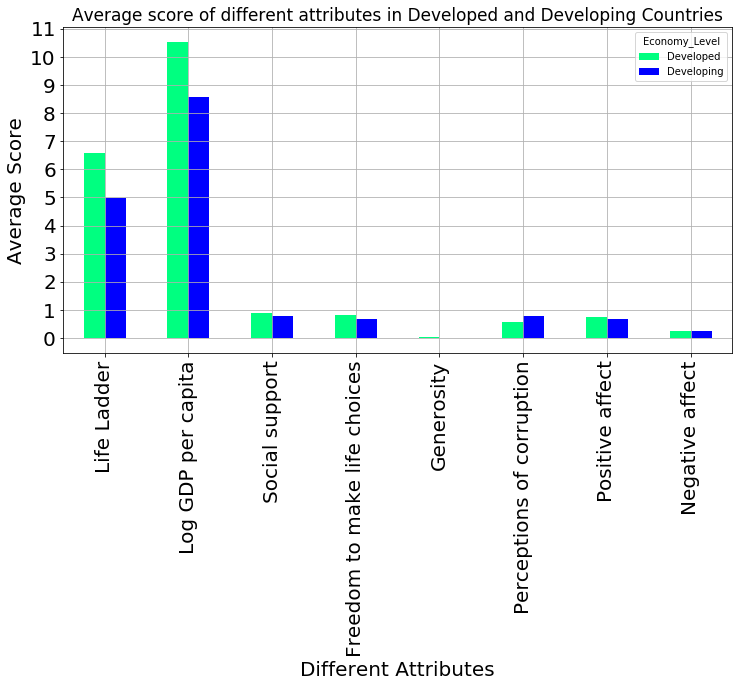

In [28]:
Mean_by_Economy_v2.plot.bar(figsize=(12,6), colormap = 'winter_r', fontsize = 20)

plt.grid()

yticks = np.arange(0, 12, 1)

plt.yticks(yticks, yticks )

plt.xticks(rotation=90)

plt.ylabel("Average Score", fontsize = 20)

plt.title('Average score of different attributes in Developed and Developing Countries', fontsize = 17)

plt.xlabel("Different Attributes", fontsize = 20)

plt.savefig("Average score comparison bar graph", bbox_inches="tight")

In [29]:
Mean_by_Economy_Life_ladder = Mean_by_Economy['Life Ladder']

Mean_by_Economy_Life_ladder = pd.DataFrame(Mean_by_Economy_Life_ladder)

Mean_by_Economy_Life_ladder_v2 = Mean_by_Economy_Life_ladder.transpose()

Mean_by_Economy_Life_ladder_v2

Economy_Level,Developed,Developing
Life Ladder,6.582948,4.966083


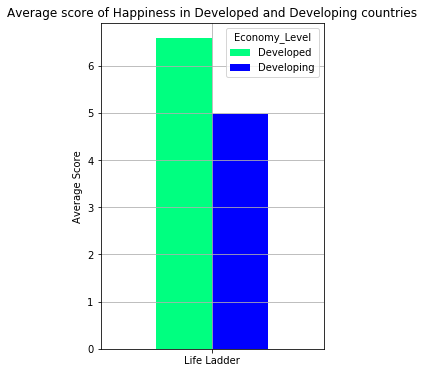

In [30]:
Mean_by_Economy_Life_ladder_v2.plot.bar(figsize=(4,6), title = 'Average score of Happiness in Developed and Developing countries',
               colormap = 'winter_r', fontsize = 10)
plt.grid()

plt.xticks(rotation=0)

plt.ylabel("Average Score")

#plt.xlabel("Happiness Score", FONTSIZE ='2')

plt.savefig("Average score comparison of Life Ladder", bbox_inches="tight")

# Corelation Graphs of Developing and Developed Countries

In [31]:
Developed_Dataset = file[file.Economy_Level == "Developed"]

Developing_Dataset = file[file.Economy_Level == "Developing"]

Developed_correlated = Developed_Dataset.corr()

Developing_correlated = Developing_Dataset.corr()

In [32]:
Developed_correlated

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,-0.012850,0.107280,-0.025888,0.236294,0.058304,-0.002086,-0.110285,-0.036785,-0.008722
Life Ladder,-0.012850,1.000000,0.529660,0.153931,0.407838,0.535898,0.666884,-0.490038,0.434488,-0.412060
Log GDP per capita,0.107280,0.529660,1.000000,-0.105289,0.248919,0.254347,0.354236,-0.647580,0.059569,-0.391516
Social support,-0.025888,0.153931,-0.105289,1.000000,0.177517,0.533942,0.119659,0.131472,0.627538,0.137304
Healthy life expectancy at birth,0.236294,0.407838,0.248919,0.177517,1.000000,0.349962,0.348915,-0.062913,0.274168,-0.074848
Freedom to make life choices,0.058304,0.535898,0.254347,0.533942,0.349962,1.000000,0.474098,-0.302299,0.658648,-0.094416
Generosity,-0.002086,0.666884,0.354236,0.119659,0.348915,0.474098,1.000000,-0.399633,0.398226,-0.177131
Perceptions of corruption,-0.110285,-0.490038,-0.647580,0.131472,-0.062913,-0.302299,-0.399633,1.000000,-0.046064,0.370238
Positive affect,-0.036785,0.434488,0.059569,0.627538,0.274168,0.658648,0.398226,-0.046064,1.000000,-0.000179
Negative affect,-0.008722,-0.412060,-0.391516,0.137304,-0.074848,-0.094416,-0.177131,0.370238,-0.000179,1.000000


In [33]:
Developing_correlated

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,-0.004333,0.004085,-0.037749,0.140488,0.170802,-0.015624,-0.090730,0.012819,0.248825
Life Ladder,-0.004333,1.000000,0.507410,0.521213,0.609271,0.244070,-0.076522,-0.040513,0.374053,-0.108611
Log GDP per capita,0.004085,0.507410,1.000000,0.432675,0.643229,0.025469,-0.240722,0.024956,0.069846,-0.026468
Social support,-0.037749,0.521213,0.432675,1.000000,0.369547,0.195726,-0.027904,-0.000423,0.466803,-0.146884
Healthy life expectancy at birth,0.140488,0.609271,0.643229,0.369547,1.000000,0.078876,-0.186678,-0.092625,0.125045,-0.000737
Freedom to make life choices,0.170802,0.244070,0.025469,0.195726,0.078876,1.000000,0.132452,0.062546,0.407538,-0.084275
Generosity,-0.015624,-0.076522,-0.240722,-0.027904,-0.186678,0.132452,1.000000,0.110573,0.247524,-0.082866
Perceptions of corruption,-0.090730,-0.040513,0.024956,-0.000423,-0.092625,0.062546,0.110573,1.000000,-0.032484,0.189017
Positive affect,0.012819,0.374053,0.069846,0.466803,0.125045,0.407538,0.247524,-0.032484,1.000000,-0.188366
Negative affect,0.248825,-0.108611,-0.026468,-0.146884,-0.000737,-0.084275,-0.082866,0.189017,-0.188366,1.000000


In [34]:
developed_data_to_be_plotted = Developed_correlated.iloc[1,:]

developing_data_to_be_plotted = Developing_correlated.iloc[1,:]

In [35]:
# Creating a dataframe having correlation data with respect to life ladder of developing and 
#  developed countries to be plotted

Life_ladder_Correlation_data = pd.DataFrame(developed_data_to_be_plotted)

Life_ladder_Correlation_data.columns = ['Developed']

Life_ladder_Correlation_data['Developing'] = developing_data_to_be_plotted

Life_ladder_Correlation_data.drop('year', inplace = True)

Life_ladder_Correlation_data.drop('Life Ladder', inplace = True)



In [36]:
#dataframe to be plotted

Life_ladder_Correlation_data

,Developed,Developing
Log GDP per capita,0.529660,0.507410
Social support,0.153931,0.521213
Healthy life expectancy at birth,0.407838,0.609271
Freedom to make life choices,0.535898,0.244070
Generosity,0.666884,-0.076522
Perceptions of corruption,-0.490038,-0.040513
Positive affect,0.434488,0.374053
Negative affect,-0.412060,-0.108611


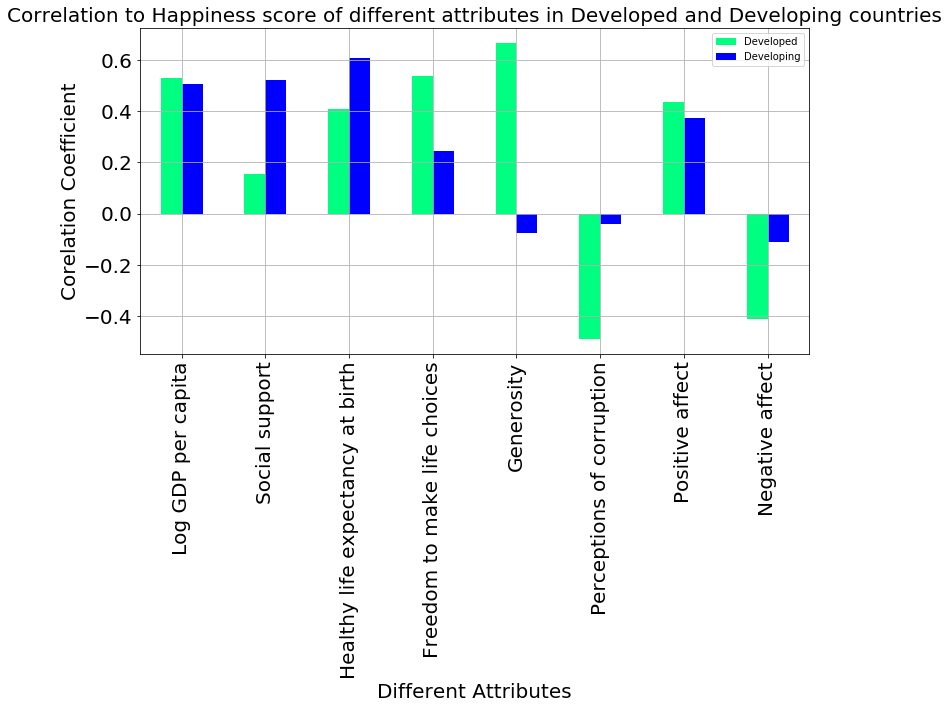

In [37]:
Life_ladder_Correlation_data.plot.bar(figsize=(12,6), colormap = 'winter_r', fontsize = 20)
                
plt.title ('Correlation to Happiness score of different attributes in Developed and Developing countries', fontsize = 20)

plt.grid()

plt.ylabel("Corelation Coefficient", fontsize = 20)

plt.xlabel("Different Attributes", fontsize = 20)


plt.savefig("Corelation bar graph", bbox_inches="tight")

# Corelation graph of transitioned countries

In [49]:
#common from Ryan's Code

transitioned_country_path = os.path.join("Transitioned_Country_dataset.csv") # common in Ryan's code
happiness_dataset_path = os.path.join("Happiness_dataset_cleaned.csv") # common in Ryan's code

transitiondf = pd.read_csv(transitioned_country_path)
happinessdf = pd.read_csv(happiness_dataset_path)

In [50]:
transitiondf.head()

,Unnamed: 0,Country_Code,Country_Name,2008,2009,2010,2011,2012,2013,2014,2015,2016,Status
0,41,CHL,Chile,UM,UM,UM,UM,H,H,H,H,H,Transitioned
1,109,LVA,Latvia,UM,H,UM,UM,H,H,H,H,H,Transitioned
2,115,LTU,Lithuania,UM,UM,UM,UM,H,H,H,H,H,Transitioned
3,150,PLW,Palau,UM,UM,UM,UM,UM,UM,UM,UM,H,Transitioned
4,156,POL,Poland,UM,H,H,H,H,H,H,H,H,Transitioned


In [51]:
transitiondf.drop(columns = "Unnamed: 0", inplace = True)

transitiondf

,Country_Code,Country_Name,2008,2009,2010,2011,2012,2013,2014,2015,2016,Status
0,CHL,Chile,UM,UM,UM,UM,H,H,H,H,H,Transitioned
1,LVA,Latvia,UM,H,UM,UM,H,H,H,H,H,Transitioned
2,LTU,Lithuania,UM,UM,UM,UM,H,H,H,H,H,Transitioned
3,PLW,Palau,UM,UM,UM,UM,UM,UM,UM,UM,H,Transitioned
4,POL,Poland,UM,H,H,H,H,H,H,H,H,Transitioned
5,SYC,Seychelles,UM,UM,UM,UM,UM,UM,H,H,H,Transitioned
6,KNA,St. Kitts and Nevis,UM,UM,UM,H,H,H,H,H,H,Transitioned
7,URY,Uruguay,UM,UM,UM,UM,H,H,H,H,H,Transitioned


In [52]:
happinessdf.head()

,Unnamed: 0,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,0,Afghanistan,2008,3.723590,7.168690204620361,0.4506623148918152,49.20966339111328,0.7181143164634705,0.18181946873664856,0.8816863298416138,0.5176371932029724,0.2581954896450043
1,1,Afghanistan,2009,4.401778,7.333789825439453,0.5523084402084351,49.62443161010742,0.6788963675498962,0.20361445844173431,0.8500354290008545,0.5839256048202515,0.23709242045879364
2,2,Afghanistan,2010,4.758381,7.3866286277771,0.5390751957893372,50.00896072387695,0.6001272201538086,0.13763019442558289,0.7067660689353943,0.6182654500007629,0.2753238081932068
3,3,Afghanistan,2011,3.831719,7.415018558502197,0.52110356092453,50.3672981262207,0.4959014058113098,0.17532922327518463,0.731108546257019,0.611387312412262,0.26717469096183777
4,4,Afghanistan,2012,3.782938,7.517126083374023,0.5206367373466492,50.70926284790039,0.5309350490570068,0.24715924263000488,0.7756198048591614,0.710384726524353,0.26791912317276


In [53]:
#Data cleaning to merge happiness dataframe with transition dataframe

happinessdf.drop(columns = "Unnamed: 0", inplace = True)

happinessdf.reset_index(inplace = True)

happinessdf.head()

,index,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,0,Afghanistan,2008,3.723590,7.168690204620361,0.4506623148918152,49.20966339111328,0.7181143164634705,0.18181946873664856,0.8816863298416138,0.5176371932029724,0.2581954896450043
1,1,Afghanistan,2009,4.401778,7.333789825439453,0.5523084402084351,49.62443161010742,0.6788963675498962,0.20361445844173431,0.8500354290008545,0.5839256048202515,0.23709242045879364
2,2,Afghanistan,2010,4.758381,7.3866286277771,0.5390751957893372,50.00896072387695,0.6001272201538086,0.13763019442558289,0.7067660689353943,0.6182654500007629,0.2753238081932068
3,3,Afghanistan,2011,3.831719,7.415018558502197,0.52110356092453,50.3672981262207,0.4959014058113098,0.17532922327518463,0.731108546257019,0.611387312412262,0.26717469096183777
4,4,Afghanistan,2012,3.782938,7.517126083374023,0.5206367373466492,50.70926284790039,0.5309350490570068,0.24715924263000488,0.7756198048591614,0.710384726524353,0.26791912317276


In [54]:
happinessdf.drop(columns = "index", inplace = True)

In [55]:
happinessdf.rename(columns = {'country' : 'Country_Name'}, inplace = True)

happinessdf.head()

,Country_Name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.168690204620361,0.4506623148918152,49.20966339111328,0.7181143164634705,0.18181946873664856,0.8816863298416138,0.5176371932029724,0.2581954896450043
1,Afghanistan,2009,4.401778,7.333789825439453,0.5523084402084351,49.62443161010742,0.6788963675498962,0.20361445844173431,0.8500354290008545,0.5839256048202515,0.23709242045879364
2,Afghanistan,2010,4.758381,7.3866286277771,0.5390751957893372,50.00896072387695,0.6001272201538086,0.13763019442558289,0.7067660689353943,0.6182654500007629,0.2753238081932068
3,Afghanistan,2011,3.831719,7.415018558502197,0.52110356092453,50.3672981262207,0.4959014058113098,0.17532922327518463,0.731108546257019,0.611387312412262,0.26717469096183777
4,Afghanistan,2012,3.782938,7.517126083374023,0.5206367373466492,50.70926284790039,0.5309350490570068,0.24715924263000488,0.7756198048591614,0.710384726524353,0.26791912317276


In [56]:
#Merging datasets

transitioned_with_happiness_merged_df = pd.merge(happinessdf,transitiondf)

transitioned_with_happiness_merged_df.head()

,Country_Name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Status
0,Chile,2006,6.062852,9.792030334472656,0.8355436325073242,68.06708526611328,0.7442919015884399,0.1563430279493332,0.6336298584938049,0.8041359782218933,...,UM,UM,UM,UM,H,H,H,H,H,Transitioned
1,Chile,2007,5.697930,9.82944107055664,0.8146209716796875,68.18262481689453,0.6619051098823547,0.2316327840089798,0.7226705551147461,0.7669786810874939,...,UM,UM,UM,UM,H,H,H,H,H,Transitioned
2,Chile,2008,5.789439,9.853857040405273,0.8037585616111755,68.29376983642578,0.6402016878128052,0.07138780504465103,0.7406673431396484,0.7565241456031799,...,UM,UM,UM,UM,H,H,H,H,H,Transitioned
3,Chile,2009,6.493686,9.82808780670166,0.8315818309783936,68.40444946289062,0.7466140389442444,0.13687169551849365,0.7342114448547363,0.8083137273788452,...,UM,UM,UM,UM,H,H,H,H,H,Transitioned
4,Chile,2010,6.635656,9.87519359588623,0.8569552302360535,68.52030944824219,0.7863674759864807,0.09515781700611115,0.7018247246742249,0.8091729879379272,...,UM,UM,UM,UM,H,H,H,H,H,Transitioned


In [57]:
transitioned_with_happiness_merged_df['Transition_Status'] = np.where(transitioned_with_happiness_merged_df['year'] < 2012, 'Developing', 'Developed')

transitioned_with_happiness_merged_df.head(10)

,Country_Name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,2009,2010,2011,2012,2013,2014,2015,2016,Status,Transition_Status
0,Chile,2006,6.062852,9.792030334472656,0.8355436325073242,68.06708526611328,0.7442919015884399,0.1563430279493332,0.6336298584938049,0.8041359782218933,...,UM,UM,UM,H,H,H,H,H,Transitioned,Developing
1,Chile,2007,5.697930,9.82944107055664,0.8146209716796875,68.18262481689453,0.6619051098823547,0.2316327840089798,0.7226705551147461,0.7669786810874939,...,UM,UM,UM,H,H,H,H,H,Transitioned,Developing
2,Chile,2008,5.789439,9.853857040405273,0.8037585616111755,68.29376983642578,0.6402016878128052,0.07138780504465103,0.7406673431396484,0.7565241456031799,...,UM,UM,UM,H,H,H,H,H,Transitioned,Developing
3,Chile,2009,6.493686,9.82808780670166,0.8315818309783936,68.40444946289062,0.7466140389442444,0.13687169551849365,0.7342114448547363,0.8083137273788452,...,UM,UM,UM,H,H,H,H,H,Transitioned,Developing
4,Chile,2010,6.635656,9.87519359588623,0.8569552302360535,68.52030944824219,0.7863674759864807,0.09515781700611115,0.7018247246742249,0.8091729879379272,...,UM,UM,UM,H,H,H,H,H,Transitioned,Developing
5,Chile,2011,6.526335,9.92513656616211,0.8190788626670837,68.64616394042969,0.7007341384887695,0.09863622486591339,0.7527555227279663,0.8037434816360474,...,UM,UM,UM,H,H,H,H,H,Transitioned,Developing
6,Chile,2012,6.599129,9.967881202697754,0.8552355766296387,68.7833480834961,0.7336109280586243,0.18186978995800018,0.7821174263954163,0.8153911828994751,...,UM,UM,UM,H,H,H,H,H,Transitioned,Developed
7,Chile,2013,6.740154,9.9987211227417,0.8624047040939331,68.93273162841797,0.7368873357772827,0.07125234603881836,0.7411549091339111,0.8550621867179871,...,UM,UM,UM,H,H,H,H,H,Transitioned,Developed
8,Chile,2014,6.844238,10.009037971496582,0.8615521788597107,69.09392547607422,0.7333263754844666,0.20335057377815247,0.7584977149963379,0.8698107600212097,...,UM,UM,UM,H,H,H,H,H,Transitioned,Developed
9,Chile,2015,6.532750,10.022896766662598,0.8271418809890747,69.26559448242188,0.7688814401626587,0.026418419554829597,0.8115113377571106,0.8030247092247009,...,UM,UM,UM,H,H,H,H,H,Transitioned,Developed


In [58]:
transitioned_with_happiness_merged_df.drop(columns = ['2009', '2010', '2011', '2012', '2013','2014','2015','2016'], inplace=True)

In [59]:
transitioned_with_happiness_merged_df.head()

,Country_Name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Country_Code,2008,Status,Transition_Status
0,Chile,2006,6.062852,9.792030334472656,0.8355436325073242,68.06708526611328,0.7442919015884399,0.1563430279493332,0.6336298584938049,0.8041359782218933,0.34765687584877014,CHL,UM,Transitioned,Developing
1,Chile,2007,5.697930,9.82944107055664,0.8146209716796875,68.18262481689453,0.6619051098823547,0.2316327840089798,0.7226705551147461,0.7669786810874939,0.3422619104385376,CHL,UM,Transitioned,Developing
2,Chile,2008,5.789439,9.853857040405273,0.8037585616111755,68.29376983642578,0.6402016878128052,0.07138780504465103,0.7406673431396484,0.7565241456031799,0.3297032117843628,CHL,UM,Transitioned,Developing
3,Chile,2009,6.493686,9.82808780670166,0.8315818309783936,68.40444946289062,0.7466140389442444,0.13687169551849365,0.7342114448547363,0.8083137273788452,0.2998911738395691,CHL,UM,Transitioned,Developing
4,Chile,2010,6.635656,9.87519359588623,0.8569552302360535,68.52030944824219,0.7863674759864807,0.09515781700611115,0.7018247246742249,0.8091729879379272,0.3001166880130768,CHL,UM,Transitioned,Developing


In [69]:
transitioned_with_happiness_merged_df_v3 = transitioned_with_happiness_merged_df.loc[transitioned_with_happiness_merged_df['Country_Name'] != 'Poland']

transitioned_with_happiness_merged_df_v3.head()

,Country_Name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Country_Code,2008,Status,Transition_Status
0,Chile,2006,6.062852,9.792030334472656,0.8355436325073242,68.06708526611328,0.7442919015884399,0.1563430279493332,0.6336298584938049,0.8041359782218933,0.34765687584877014,CHL,UM,Transitioned,Developing
1,Chile,2007,5.697930,9.82944107055664,0.8146209716796875,68.18262481689453,0.6619051098823547,0.2316327840089798,0.7226705551147461,0.7669786810874939,0.3422619104385376,CHL,UM,Transitioned,Developing
2,Chile,2008,5.789439,9.853857040405273,0.8037585616111755,68.29376983642578,0.6402016878128052,0.07138780504465103,0.7406673431396484,0.7565241456031799,0.3297032117843628,CHL,UM,Transitioned,Developing
3,Chile,2009,6.493686,9.82808780670166,0.8315818309783936,68.40444946289062,0.7466140389442444,0.13687169551849365,0.7342114448547363,0.8083137273788452,0.2998911738395691,CHL,UM,Transitioned,Developing
4,Chile,2010,6.635656,9.87519359588623,0.8569552302360535,68.52030944824219,0.7863674759864807,0.09515781700611115,0.7018247246742249,0.8091729879379272,0.3001166880130768,CHL,UM,Transitioned,Developing


In [74]:
#More Datacleaning

transitioned_with_happiness_merged_df_v3.drop(columns = ['Country_Code', '2008','Status'], inplace=True)

C:\Users\ANKGOE\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [75]:
transitioned_with_happiness_merged_df_v3.dtypes

Country_Name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                   object
Social support                       object
Healthy life expectancy at birth     object
Freedom to make life choices         object
Generosity                           object
Perceptions of corruption            object
Positive affect                      object
Negative affect                      object
Transition_Status                    object
dtype: object

In [76]:
#For correlation calculation, these columns should be int or float datatype. Converting to carry on the analysis

transitioned_with_happiness_merged_df_v3 = transitioned_with_happiness_merged_df_v3.replace("Not Available",np.nan).dropna()

transitioned_with_happiness_merged_df_v3.iloc[:,3:11] = transitioned_with_happiness_merged_df_v3.iloc[:,3:11].astype(float)

In [78]:
transitioned_with_happiness_merged_df_v3.dtypes

Country_Name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
Transition_Status                    object
dtype: object

In [79]:
transitioned_with_happiness_merged_df_v3.to_csv("Transitioned_Country_merged_with_Happiness_dataset.csv")

In [81]:
Developing_subset = transitioned_with_happiness_merged_df_v3.loc[transitioned_with_happiness_merged_df_v3.Transition_Status == 'Developing']

Developed_subset = transitioned_with_happiness_merged_df_v3.loc[transitioned_with_happiness_merged_df_v3.Transition_Status == 'Developed']

In [82]:
Developing_subset.head()

,Country_Name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Transition_Status
0,Chile,2006,6.062852,9.792030,0.835544,68.067085,0.744292,0.156343,0.633630,0.804136,0.347657,Developing
1,Chile,2007,5.697930,9.829441,0.814621,68.182625,0.661905,0.231633,0.722671,0.766979,0.342262,Developing
2,Chile,2008,5.789439,9.853857,0.803759,68.293770,0.640202,0.071388,0.740667,0.756524,0.329703,Developing
3,Chile,2009,6.493686,9.828088,0.831582,68.404449,0.746614,0.136872,0.734211,0.808314,0.299891,Developing
4,Chile,2010,6.635656,9.875194,0.856955,68.520309,0.786367,0.095158,0.701825,0.809173,0.300117,Developing


In [83]:
Developed_subset.head()

,Country_Name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Transition_Status
6,Chile,2012,6.599129,9.967881,0.855236,68.783348,0.733611,0.181870,0.782117,0.815391,0.287592,Developed
7,Chile,2013,6.740154,9.998721,0.862405,68.932732,0.736887,0.071252,0.741155,0.855062,0.285454,Developed
8,Chile,2014,6.844238,10.009038,0.861552,69.093925,0.733326,0.203351,0.758498,0.869811,0.276103,Developed
9,Chile,2015,6.532750,10.022897,0.827142,69.265594,0.768881,0.026418,0.811511,0.803025,0.332747,Developed
10,Chile,2016,6.579056,10.030416,0.841388,69.437271,0.652290,0.087950,0.858125,0.869229,0.283042,Developed


In [84]:
#Creating Correlation Subsets

Developing_state_corr = Developing_subset.corr()

Developed_state_corr = Developed_subset.corr()

In [85]:
Developing_state_corr

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.220581,0.213907,-0.108411,0.270082,-0.038334,0.128919,0.000825,-0.080381,-0.207288
Life Ladder,0.220581,1.000000,-0.288443,0.107511,0.715144,0.631710,0.469113,-0.615928,0.707938,0.480178
Log GDP per capita,0.213907,-0.288443,1.000000,0.014801,-0.579389,-0.637573,-0.198570,0.832933,-0.618417,-0.137277
Social support,-0.108411,0.107511,0.014801,1.000000,-0.412847,0.029786,-0.708520,0.054582,-0.262421,-0.302871
Healthy life expectancy at birth,0.270082,0.715144,-0.579389,-0.412847,1.000000,0.646508,0.780004,-0.797264,0.808102,0.590244
Freedom to make life choices,-0.038334,0.631710,-0.637573,0.029786,0.646508,1.000000,0.360397,-0.889488,0.887264,0.170805
Generosity,0.128919,0.469113,-0.198570,-0.708520,0.780004,0.360397,1.000000,-0.420264,0.647214,0.672596
Perceptions of corruption,0.000825,-0.615928,0.832933,0.054582,-0.797264,-0.889488,-0.420264,1.000000,-0.862938,-0.284621
Positive affect,-0.080381,0.707938,-0.618417,-0.262421,0.808102,0.887264,0.647214,-0.862938,1.000000,0.416912
Negative affect,-0.207288,0.480178,-0.137277,-0.302871,0.590244,0.170805,0.672596,-0.284621,0.416912,1.000000


In [86]:
Developed_state_corr

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.156244,0.278853,0.257766,0.209537,0.248733,-0.189786,-0.006269,0.161142,0.149815
Life Ladder,0.156244,1.000000,-0.354011,-0.127397,0.848535,0.625809,0.585527,-0.561797,0.857076,0.469659
Log GDP per capita,0.278853,-0.354011,1.000000,0.376106,-0.435335,-0.744340,-0.599425,0.842092,-0.651246,0.119109
Social support,0.257766,-0.127397,0.376106,1.000000,-0.334506,-0.038921,-0.755715,0.083309,-0.310946,-0.069913
Healthy life expectancy at birth,0.209537,0.848535,-0.435335,-0.334506,1.000000,0.662201,0.682048,-0.518529,0.920947,0.561064
Freedom to make life choices,0.248733,0.625809,-0.744340,-0.038921,0.662201,1.000000,0.441958,-0.921048,0.808504,0.095697
Generosity,-0.189786,0.585527,-0.599425,-0.755715,0.682048,0.441958,1.000000,-0.464485,0.702741,0.108532
Perceptions of corruption,-0.006269,-0.561797,0.842092,0.083309,-0.518529,-0.921048,-0.464485,1.000000,-0.735144,0.097864
Positive affect,0.161142,0.857076,-0.651246,-0.310946,0.920947,0.808504,0.702741,-0.735144,1.000000,0.412603
Negative affect,0.149815,0.469659,0.119109,-0.069913,0.561064,0.095697,0.108532,0.097864,0.412603,1.000000


In [87]:
Developing_correlation_to_be_plotted = Developing_state_corr.loc['Life Ladder',:] # extracting row to be plotted

Correlation_df_v1 = pd.DataFrame(Developing_correlation_to_be_plotted)

Correlation_df_v1.columns = ['Developing_State']

Correlation_df_v1

,Developing_State
year,0.220581
Life Ladder,1.000000
Log GDP per capita,-0.288443
Social support,0.107511
Healthy life expectancy at birth,0.715144
Freedom to make life choices,0.631710
Generosity,0.469113
Perceptions of corruption,-0.615928
Positive affect,0.707938
Negative affect,0.480178


In [88]:
#Adding row for developed state in the same dataframe

Developed_correlation_to_be_plotted= Developed_state_corr.loc['Life Ladder',:]

Correlation_df_v1['Developed_State'] = Developed_correlation_to_be_plotted

Correlation_df_v1


,Developing_State,Developed_State
year,0.220581,0.156244
Life Ladder,1.000000,1.000000
Log GDP per capita,-0.288443,-0.354011
Social support,0.107511,-0.127397
Healthy life expectancy at birth,0.715144,0.848535
Freedom to make life choices,0.631710,0.625809
Generosity,0.469113,0.585527
Perceptions of corruption,-0.615928,-0.561797
Positive affect,0.707938,0.857076
Negative affect,0.480178,0.469659


In [89]:
Correlation_df_v1.drop(labels = ['year', 'Life Ladder'], inplace = True)

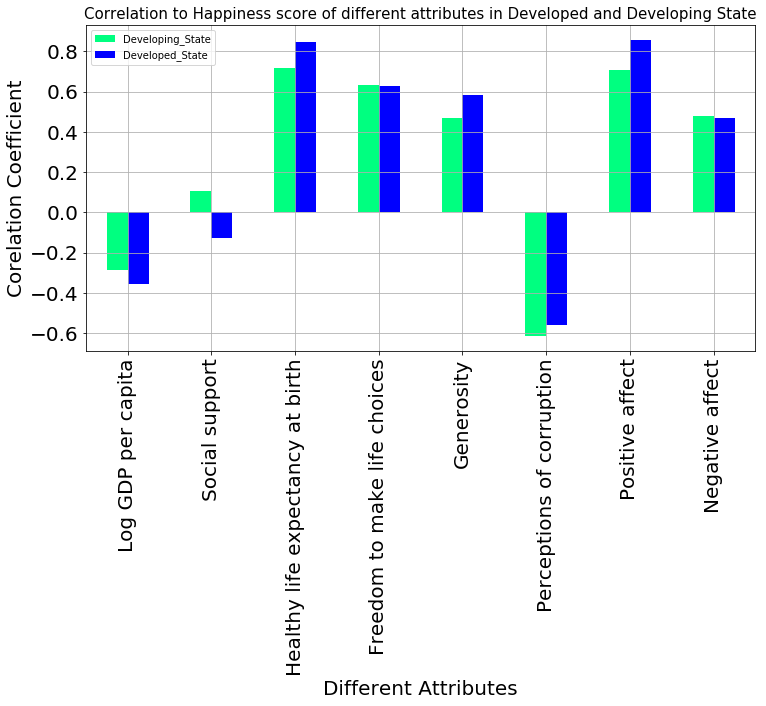

In [90]:
Correlation_df_v1.plot.bar(figsize=(12,6), colormap = 'winter_r', fontsize = 20 )

plt.grid()

plt.ylabel("Corelation Coefficient", fontsize = 20)

plt.xlabel("Different Attributes", fontsize = 20)

plt.title("Correlation to Happiness score of different attributes in Developed and Developing State", fontsize = 15)


plt.savefig("Correlation bar graph - Transitioned Countries", bbox_inches="tight")